In [107]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [10]:
import warnings
warnings.filterwarnings('ignore') #ignore ipython notebook warnings

In [11]:
dataset_loction = "/Users/sandylee/Google Drive/Flatiron School/london-ds-010620/mod_1/student/group_project/KayCee/source/kc_house_data.csv" #variable for dataset location

In [13]:
data = pd.read_csv(dataset_loction) #import dataset

In [14]:
duplicate_properties = data[data.duplicated(subset="id",keep=False)] #extract properties sold more than once into a new dataframe

In [15]:
duplicate_properties.insert(2,"time_diff",0) #add a column for time difference

In [16]:
duplicate_properties.insert(4,"price_diff",0) #add a column for price difference

In [17]:
duplicate_properties.insert(5,"rate_of_price_increase",0) #add a column for the rate of price increase

In [18]:
duplicate_properties["date"] = pd.to_datetime(duplicate_properties['date']) #convert date column to datetime objects from str

In [19]:
duplicate_properties["time_diff"] = pd.to_datetime(duplicate_properties['time_diff']) #convert time_diff column to datetime objects from str

In [20]:
duplicate_properties = duplicate_properties.reset_index() #reset index 

In [21]:
duplicate_properties = duplicate_properties.drop("index", 1) #drop duplicate index column

In [22]:
duplicate_properties = duplicate_properties.drop(317) #drop one entry from a property sold 3 times that is causing issues

In [23]:
duplicate_properties = duplicate_properties.reset_index() #reset index (again) 

In [24]:
duplicate_properties = duplicate_properties.drop("index", 1) #drop duplicate index column (again)

In [25]:
duplicate_properties['time_diff'] = duplicate_properties.groupby(['id'])['date'].shift(1) #run a lag operation on dates

In [26]:
duplicate_properties['price_diff'] = duplicate_properties.groupby(['id'])['price'].shift(1) #run a lag operation on prices

In [27]:
duplicate_properties["time_diff"] = duplicate_properties['date'] - duplicate_properties['time_diff'] #get the date difference and add it to 'time_diff' column

In [28]:
duplicate_properties["price_diff"] = duplicate_properties['price'] - duplicate_properties['price_diff'] #get the price difference and add it to 'price_diff' column

In [29]:
analysis_df = duplicate_properties.copy() #make a new dataframe for analysis

In [30]:
for row in range(0,len(analysis_df),2):
     analysis_df.drop(index=row,inplace=True) #remove redundant NaN rows 

In [31]:
analysis_df.insert(3,"time_diff_seconds",0) #add a column for time difference as an int

In [32]:
analysis_df["time_diff_seconds"] = pd.to_numeric(analysis_df["time_diff"])/1000000000 #convert timedelta obeject to seconds (stored as ns by default)

In [33]:
analysis_df["rate_of_price_increase"] = analysis_df["price_diff"]/(analysis_df["time_diff_seconds"]/86400) #calculate rate of increase in prices

In [34]:
hot_zip_codes = analysis_df.groupby(["zipcode"])["rate_of_price_increase"].mean() #create a Pandas series of rate of the mean rate of price inrease grouped by zip code

In [35]:
hot_zip_codes = analysis_df.groupby(["zipcode"]).mean() #group everything by zipcode and take the mean

In [36]:
hot_zip_codes.drop(columns = ["id", "time_diff_seconds", "price", "price_diff", "bedrooms", "bathrooms"],inplace = True) #remove extranous columns

In [37]:
hot_zip_codes.drop(columns = ["sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition"],inplace = True) #remove extranous columns

In [38]:
hot_zip_codes.drop(columns = ["grade", "sqft_above", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"],inplace = True) #remove extranous columns

In [66]:
hot_zip_codes.sort_values(ascending = False, inplace = True, by="rate_of_price_increase")  #sort hot zip codes in descending order

In [68]:
hot_zip_codes.reset_index(level=0, inplace=True)

In [88]:
hot_zip_codes = hot_zip_codes.sort_values(['rate_of_price_increase']).reset_index(drop=True)

In [91]:
y_axis = [98034, 
          98155, 
          98126, 
          98117, 
          98011, 
          98177, 
          98148, 
          98007, 
          98199, 
          98118, 
          98042, 
          98074, 
          98115, 
          98032, 
          98133, 
          98116, 
          98052, 
          98028, 
          98055, 
          98103, 
          98122, 
          98106, 
          98072, 
          98059, 
          98053, 
          98003, 
          98031, 
          98004, 
          98144, 
          98198, 
          98125, 
          98030, 
          98039, 
          98178, 
          98045, 
          98001, 
          98056, 
          98146, 
          98107, 
          98166, 
          98070, 
          98168, 
          98006, 
          98024, 
          98038, 
          98023, 
          98188, 
          98058, 
          98112, 
          98002, 
          98108, 
          98065, 
          98075, 
          98077, 
          98014, 
          98029, 
          98027, 
          98033, 
          98010]

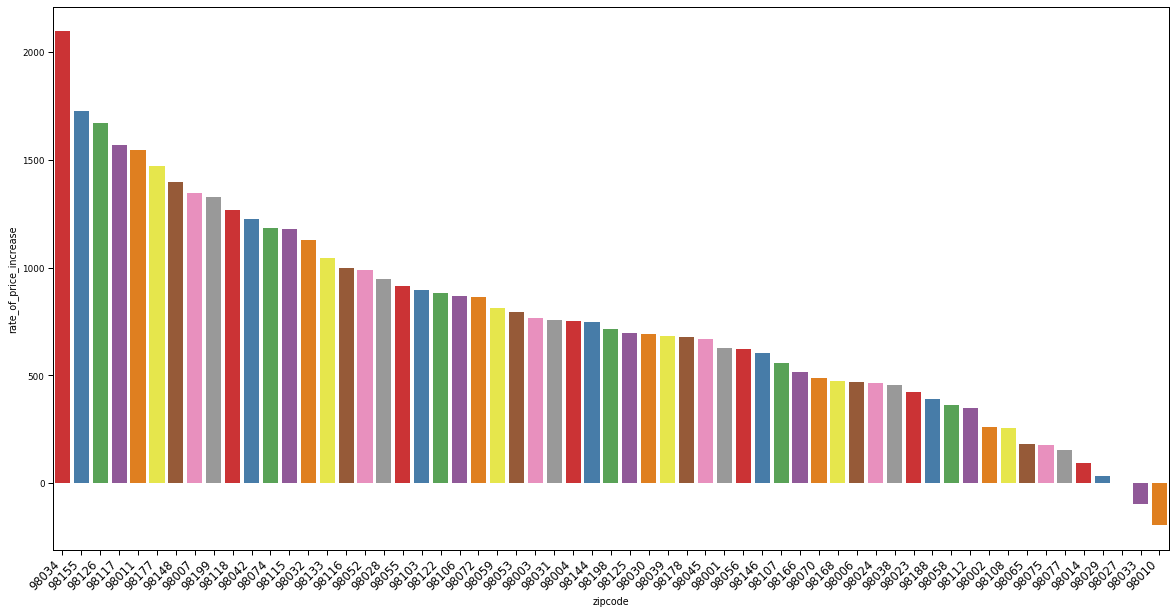

In [142]:
plt.figure(figsize=(20,10))
chart = sns.barplot(x = "zipcode", 
                    y = "rate_of_price_increase", 
                    data = hot_zip_codes, 
                    order = y_axis, 
                    palette="Set1")

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='large');


In [144]:
analysis_df

,id,date,time_diff,time_diff_seconds,price,price_diff,rate_of_price_increase,bedrooms,bathrooms,sqft_living,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6021501535,2014-12-23,151 days,13046400.0,700000.0,270000.0,1788.079470,3,1.50,1580,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
3,4139480200,2014-12-09,174 days,15033600.0,1400000.0,20000.0,114.942529,4,3.25,4290,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
5,7520000520,2015-03-11,187 days,16156800.0,240500.0,8500.0,45.454545,2,1.00,1240,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
7,3969300030,2014-12-29,159 days,13737600.0,239900.0,74900.0,471.069182,4,1.00,1000,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
9,2231500030,2015-03-24,174 days,15033600.0,530000.0,215000.0,1235.632184,4,2.25,2180,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,7853400250,2015-02-19,260 days,22464000.0,645000.0,35000.0,134.615385,4,3.50,2910,...,9,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
345,2724049222,2014-12-01,121 days,10454400.0,220000.0,56200.0,464.462810,2,2.50,1000,...,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
347,8564860270,2015-03-30,265 days,22896000.0,502000.0,52010.0,196.264151,4,2.50,2680,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
349,6300000226,2015-05-04,312 days,26956800.0,380000.0,140000.0,448.717949,4,1.00,1200,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [145]:
seasonality_df = analysis_df.groupby(["date"]).count()